# Gensim word vector visualization of various word vectors

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA  # Principal component analysis (PCA)

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

这里使用Gensim处理词向量。Gensim并不是一个真正的深度学习包，而是一个用于单词和文本相似性建模的包，效率高，可扩展性强，应用相当广泛。

[GloVe](https://nlp.stanford.edu/projects/glove/)是斯坦福大学开发的词向量，Gensim不支持它的格式，但提供了将其转换为word2vec的方法。下面使用了100维的词向量文件，维度越高，后面查相似单词等操作的结果越好，但载入速度更慢

In [2]:
# 数据下载：http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip

glove_file = datapath('F:/Python/CS224N/1 - Introduction and Word Vectors/Gensim/glove.6B/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)  # glove转换为word2vec的方法

(400000, 100)

In [3]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

加载完成后，就可以调用gensim中的各种方法来查看词向量的属性、相关性等。

In [4]:
model.most_similar('eminem')  # 输出与eminem最相近的10个词

[('rapper', 0.7356191873550415),
 ('jay-z', 0.7335458397865295),
 ('kanye', 0.7171639204025269),
 ('ludacris', 0.6866706609725952),
 ('rap', 0.6838935017585754),
 ('dre', 0.6807680726051331),
 ('snoop', 0.677169919013977),
 ('rappers', 0.6731076240539551),
 ('t.i.', 0.6723411083221436),
 ('akon', 0.6514133810997009)]

In [5]:
model.most_similar(positive=['woman', 'king'], negative=['man'])  # 与woman和king相近，但与man不相似

[('queen', 0.7698541283607483),
 ('monarch', 0.6843380928039551),
 ('throne', 0.6755737066268921),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520533561706543),
 ('prince', 0.6517034769058228),
 ('elizabeth', 0.6464517116546631),
 ('mother', 0.631171703338623),
 ('emperor', 0.6106470823287964),
 ('wife', 0.6098655462265015)]

In [6]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [7]:
analogy('japan', 'japanese', 'australia')  # 与australia和japanese相近，但与japan远离，得到了australian

'australian'

In [8]:
analogy('tall', 'tallest', 'long')  # 可以找到同类对应词

'longest'

In [9]:
analogy('good', 'fantastic', 'bad')  # 近义词

'terrible'

In [10]:
print(model.doesnt_match("metal rock obama jazz".split()))  # 找到多个词中与其余词相关度最低的

obama


E:\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [11]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]  # PCA用于降维，以将词向量在二维坐标系中表示出来
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

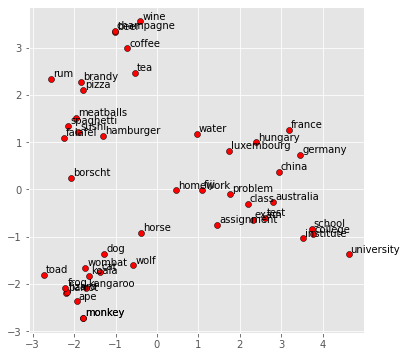

In [12]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])